In [1]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as py
import random
import pandas as pd
from matplotlib import gridspec


In [2]:
####################################### Set Axes
def set_axes(ax, xlim=None, ylim=None, fontsize=16, twinx=True, twiny=True, minor=True, inout='in'):
        
        if not ylim is None:
            ax.set_ylim(ylim)
        else:
            ylim = ax.get_ylim() 
            
        if not xlim is None:    
            ax.set_xlim(xlim) 
        else:
            xlim = ax.get_xlim()
            
        ax.tick_params(which='major', length=6, width=1., direction=inout)
#         if minor:
        ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)  
        
        if twiny:
            y_ax = ax.twinx()
            y_ax.set_ylim(ylim)
            y_ax.set_yticklabels([])
            y_ax.minorticks_on()
            y_ax.tick_params(which='major', length=6, width=1., direction=inout)
            if minor:
                y_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout) 
        
        if twinx:
            x_ax = ax.twiny()
            x_ax.set_xlim(xlim)
            x_ax.set_xticklabels([])
            x_ax.minorticks_on()
            x_ax.tick_params(which='major', length=6, width=1.0, direction=inout)
            if minor:
                x_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)     

        for tick in ax.xaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        for tick in ax.yaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        
        return x_ax, y_ax

In [1]:
# table = np.genfromtxt('DMs_EDD.csv.test' , delimiter='|', 
#                         filling_values=-1, names=True, dtype=None, encoding=None)

df = pd.read_csv("../calibrators/DMs_EDD.csv.test", sep='|')
# revising the column names
for col in df.columns:
    newcol = col.strip()
    df.rename(columns={col:newcol}, inplace=True)

# pgc_edd = table['pgc']
# logWimx   = table['logWimx']
# logWimx_e = table['logWimx_e']
# inc   = table['inc']
# Vmod_edd   = table['Vmod']
# Vls_edd   = table['Vls']

# DM_edd  = table['DMi']
# dDM_edd = table['dDMi']
# DM_edd_raw  = table['DMi_raw']


# iii = table['iii']

df['i***'] = df['iii']
df['I'] = df['iii']-df['DMi']
df['DMbest'] = df['DMi']

ind = ((df['logWimx']<2.0))
df['inc_new'] = df['inc'].apply(lambda x: x+20 if x <= 70 else x)
df['DMbest_'] = df['DMbest']
df['DMbest_'][ind] = df['DMbest'][ind] - 8.34*np.log10(np.sin(df['inc_new'][ind]*np.pi/180.)) + 8.34*np.log10(np.sin(df['inc'][ind]*np.pi/180.))


df['eDMbest'] = df['dDMi']

df['logD'] = (df['DMbest']-25)/5.
df['logH'] = np.log10(df.Vmod) - df['logD']
df['H0'] = 10**df.logH
df['Vmod'] = df.Vmod

df['logV'] = np.log10(df.Vmod)

df['Qs'] = df['Sqlt']
df['Qw'] = df['Wqlt']

df['lgWmxi'] = df['logWimx']

df = df[df['i***']>0]


print(df.columns)
df.head()

NameError: name 'pd' is not defined

In [29]:
df = pd.read_csv("CF4_TF_distances.csv", sep='|')

x = df['i***']-df.DMbest
np.max(x[df['i***']>0])
df['I'] = x

df['logD'] = (df['DMi_raw']-25)/5.
df['logH'] = np.log10(df.f*df.Vcmb) - df['logD']
df['H0'] = 10**df.logH
df['Vmod'] = df.f*df.Vcmb
df['logWimx'] = df['lgWmxi']

print(df.columns)
df.head()

Index(['pgc', 'DMbest', 'eDMbest', 'PGC1', 'Nest', 'Vh', 'Vls', 'Vcmb', 'f',
       'DMr', 'eDMr', 'DMr_rms', 'DMr_raw', 'DMi', 'eDMi', 'DMi_rms',
       'DMi_raw', 'DMz', 'eDMz', 'DMz_rms', 'DMz_raw', 'DM_w1', 'eDM_w1',
       'DM_w1_rms', 'DM_w1_raw', 'lgWmxi', 'elgWi', 'inc', 'Qs', 'Qw', 'g***',
       'r***', 'i***', 'z***', 'w1***', 'w2***', 'R_so', 'P1_W2', 'DM_so',
       'RA', 'DE', 'GLong', 'GLat', 'SGL', 'SGB', 'Nkt', 'N15', 'SGLg', 'SGBg',
       'Vmodg', 'I', 'logD', 'logH', 'H0', 'Vmod', 'logWimx'],
      dtype='object')


,pgc,DMbest,eDMbest,PGC1,Nest,Vh,Vls,Vcmb,f,DMr,...,N15,SGLg,SGBg,Vmodg,I,logD,logH,H0,Vmod,logWimx
0,2,34.24,0.29,73150,200275,5004,5296,4726,1.013,0.00,...,7,341.4922,20.7395,4976,-34.24,-5.000,8.680103,4.787438e+08,4787.438,2.744
1,4,33.29,0.17,120,202766,4458,4706,4109,1.011,33.31,...,0,316.0587,18.4514,4154,-18.17,1.674,1.944487,8.800094e+01,4154.199,2.189
2,12,35.03,0.22,12,210177,6548,6685,6195,1.016,0.00,...,1,286.4249,11.3510,6279,-35.03,-5.000,8.798935,6.294120e+08,6294.120,2.606
3,16,34.70,0.24,16,211419,5667,5809,5312,1.014,34.70,...,1,287.6120,11.7030,5434,-21.12,1.908,1.823296,6.657268e+01,5386.368,2.515
4,55,34.00,0.24,55,0,4779,5052,4454,1.012,34.00,...,0,327.0996,19.7763,4507,-18.78,1.812,1.841931,6.949135e+01,4507.448,2.260


<AxesSubplot:>

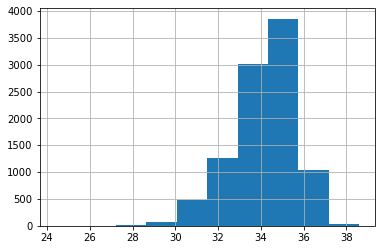

In [30]:
df.DMbest.hist()

<AxesSubplot:>

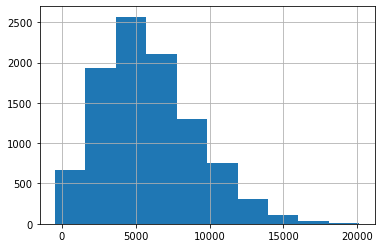

In [31]:
df.Vmod.hist()

In [41]:
from scipy.optimize import curve_fit


def myHubble(D, H0):
    return H0    

def PlotMe(ax, df, low, high, color='r', delta=0, label=None, param='DMbest', quality='Qs', mag='i'):
    
    c = [-0.12677302,  4.23325456]
    #  & ((df.I<-17-8.32*(df.lgWmxi-2.043)) | (df.I<-17.5)) & (df.I<-16.5)
    dff = df[(df[param]>low) & (df[param]<high) & (df.Vmod > 0) & (df[quality]>2)]
#     &
#              (df.logWimx < (c[0]-0.05)*df['i***']+c[1]+0.90) & (df.logWimx>1.8)
#            ]
    dff.plot.scatter(
                     x=mag+'***', y='H0', alpha=0.1, ax=ax, color='k', s=2
                     )

    X = dff[mag+'***'].values
    Y = dff['H0'].values+delta
    xmin = np.min(X)
    xmax = np.max(X)
    lab = True
    for i in np.arange(xmin, xmax, 1):
        xp = []
        yp = []
        for ii in range(len(X)):
            xi = X[ii]
            if xi>=i and xi<i+1 and not np.isnan(Y[ii]):
                xp.append(xi)
                yp.append(Y[ii])
        if len(xp)>0:
            if lab:
                labe = label
                lab = False
            else:
                labe=None
                
            xp = np.asarray(xp)
            yp = np.asarray(yp)
            ax.errorbar(np.mean(xp), 10**np.median(np.log10(yp)), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                        color=color, ms=6, label=labe)     
#             print np.median(xp), 10**np.median(yp)

    x_ax, y_ax = set_axes(ax, (5,18), (35,150), fontsize=14) 
    ax.set_yscale('log')
    
    from matplotlib.ticker import MultipleLocator

    from matplotlib.ticker import NullFormatter
    
    ax.set_yticks(np.arange(30,150, step=30))
    ax.yaxis.set_major_formatter(NullFormatter())  
    ax.yaxis.set_minor_formatter(NullFormatter())

    ax.yaxis.set_major_locator(MultipleLocator(30))
    ax.yaxis.set_minor_locator(MultipleLocator(10))

    plt.yticks([40, 70, 100, 130], ('40', '70', '100','130'))
    # ax.set_yticks(np.arange(50,140, step=10))



    y_ax.set_yticks(np.arange(30,150, step=30))
    y_ax.set_yscale('log')
    y_ax.yaxis.set_major_formatter(NullFormatter())  
    y_ax.yaxis.set_minor_formatter(NullFormatter())
    y_ax.yaxis.set_major_locator(MultipleLocator(30))
    y_ax.yaxis.set_minor_locator(MultipleLocator(10))    
    
    ax.set_ylabel(r'$H^{raw}_{i}$', fontsize=18)
    ax.legend(loc=3)
    
    
    fit, cov = curve_fit(myHubble, X, dff.logH)
    m = fit[0]
    H0 = 10**m
    ax.plot([5,20], [H0, H0], '--', color='blue')

/home/ehsan/anaconda3/envs/reco_base/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/ehsan/anaconda3/envs/reco_base/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/ehsan/anaconda3/envs/reco_base/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:

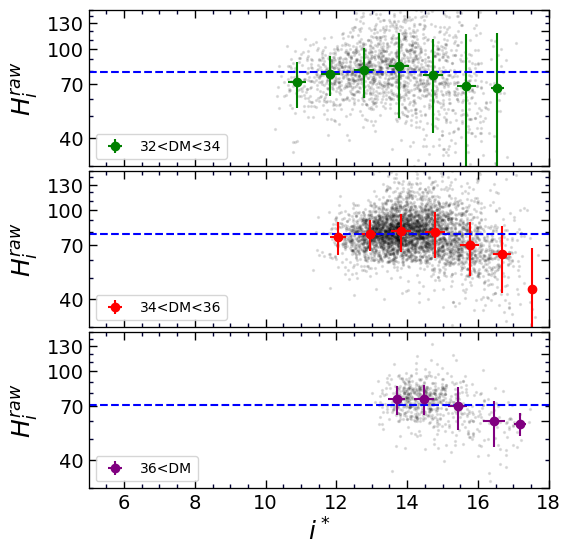

In [42]:
fig = py.figure(figsize=(5, 8), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(4,1) ; p=0

# ax = plt.subplot(gs[p]) ; p+=1
# PlotMe(ax, df, 31, 33, color='b', delta=0, label='DM<32')
mag='i'


ax = plt.subplot(gs[p]) ; p+=1
PlotMe(ax, df, 32, 34, color='green', delta=0, label='32<DM<34', mag=mag)

ax = plt.subplot(gs[p]) ; p+=1
PlotMe(ax, df, 34, 36, color='r', label='34<DM<36', mag=mag)

ax = plt.subplot(gs[p]) ; p+=1
PlotMe(ax, df, 36, 40, color='purple', delta=0, label='36<DM', mag=mag)

ax.set_xlabel(r'$i^*$', fontsize=18)

plt.subplots_adjust(hspace=0.03, wspace=0.2)

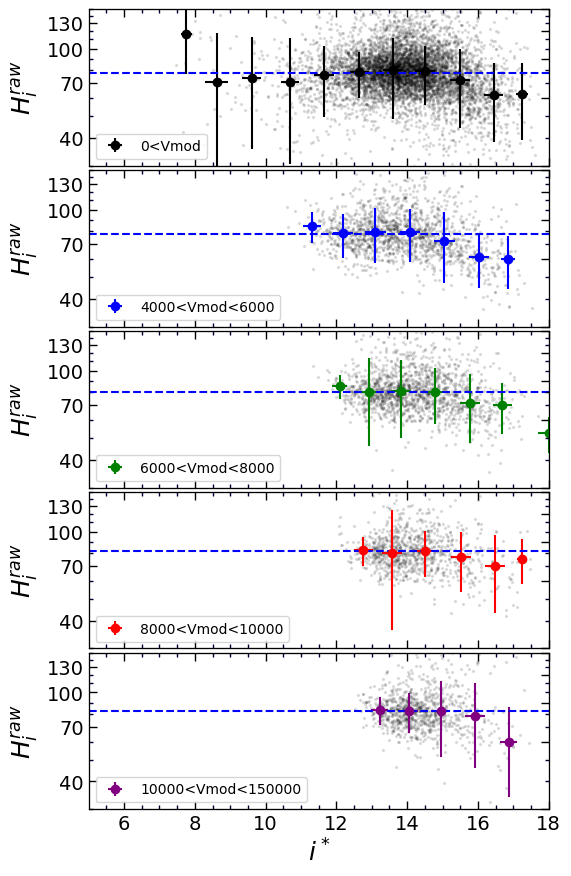

In [43]:
fig = py.figure(figsize=(5, 10), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(5,1) ; p=0

mag='i'


ax = plt.subplot(gs[p]) ; p+=1
PlotMe(ax, df, 0, 20000, color='k', delta=0, label='0<Vmod', param='Vmod', mag=mag)

ax = plt.subplot(gs[p]) ; p+=1
PlotMe(ax, df, 4000, 6000, color='b', delta=0, label='4000<Vmod<6000', param='Vmod', mag=mag)

ax = plt.subplot(gs[p]) ; p+=1
PlotMe(ax, df, 6000, 8000, color='g', delta=0, label='6000<Vmod<8000', param='Vmod', mag=mag)

ax = plt.subplot(gs[p]) ; p+=1
PlotMe(ax, df, 8000, 10000, color='r', delta=0, label='8000<Vmod<10000', param='Vmod', mag=mag)

ax = plt.subplot(gs[p]) ; p+=1
PlotMe(ax, df, 10000, 15000, color='purple', delta=0, label='10000<Vmod<150000', param='Vmod', mag=mag)

ax.set_xlabel(r'$i^*$', fontsize=18)

plt.subplots_adjust(hspace=0.03, wspace=0.2)

KeyError: 'DMbest_'

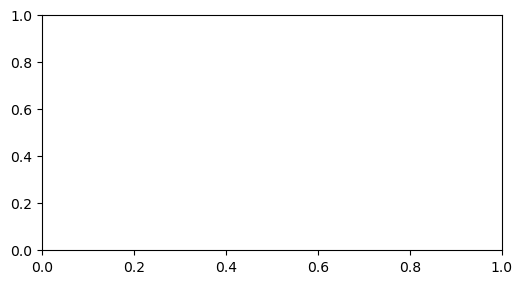

In [35]:
fig = py.figure(figsize=(5, 10), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(3,1) ; p=0

dff = df[(df.Qs>2)]# & ((df.I<-17-8.32*(df.lgWmxi-2.043)) | (df.I<-17.5)) & (df.I<-16.5)]

ax = plt.subplot(gs[p]) ; p+=1
X = 'i***'
Y = 'DMbest_'
dff[dff.I>-17].plot.scatter(x=X, y=Y, color='k', alpha=0.1, ax=ax, label=r'$-17<M_i$')
dff[((dff.I<-17) & (dff.I>-19))].plot.scatter(x=X, y=Y, color='purple', alpha=0.1, ax=ax, label=r'$-19<M_i<-17$')
dff[((dff.I<-19) & (dff.I>-21))].plot.scatter(x=X, y=Y, color='b', alpha=0.1, ax=ax, label=r'$-19<M_i<-21$')
dff[((dff.I<-21) & (dff.I>-23))].plot.scatter(x=X, y=Y, color='green', alpha=0.1, ax=ax, label=r'$-21<M_i<-23$')
dff[((dff.I<-23) & (dff.I>-25))].plot.scatter(x=X, y=Y, color='red', alpha=0.1, ax=ax, label=r'$-23<M_i$')

x_ax, y_ax = set_axes(ax, (5,19), (25,40), fontsize=14) 
ax.set_xlabel("i* [mag]", fontsize=14)
ax.set_ylabel("DM [mag]", fontsize=14)



X = dff[X].values
Y = dff[Y].values
xmin = np.min(X)
xmax = np.max(X)
for i in np.arange(xmin, xmax, 1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1 and not np.isnan(Y[ii]):
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='red', ms=6) 


# ax = plt.subplot(gs[p]) ; p+=1
# X = 'i***'
# Y = 'logH'
# dff[dff.I>-17].plot.scatter(x=X, y=Y, color='k', alpha=0.1, ax=ax)
# dff[((dff.I<-17) & (dff.I>-19))].plot.scatter(x=X, y=Y, color='purple', alpha=0.1, ax=ax)
# dff[((dff.I<-19) & (dff.I>-21))].plot.scatter(x=X, y=Y, color='b', alpha=0.1, ax=ax)
# dff[((dff.I<-21) & (dff.I>-23))].plot.scatter(x=X, y=Y, color='green', alpha=0.1, ax=ax)
# dff[((dff.I<-23) & (dff.I>-25))].plot.scatter(x=X, y=Y, color='red', alpha=0.1, ax=ax)



# ax = plt.subplot(gs[p]) ; p+=1
# X = 'i***'
# Y = 'lgWmxi'
# dff[dff.I>-17].plot.scatter(x=X, y=Y, color='k', alpha=0.1, ax=ax)
# dff[((dff.I<-17) & (dff.I>-19))].plot.scatter(x=X, y=Y, color='purple', alpha=0.1, ax=ax)
# dff[((dff.I<-19) & (dff.I>-21))].plot.scatter(x=X, y=Y, color='b', alpha=0.1, ax=ax)
# dff[((dff.I<-21) & (dff.I>-23))].plot.scatter(x=X, y=Y, color='green', alpha=0.1, ax=ax)
# dff[((dff.I<-23) & (dff.I>-25))].plot.scatter(x=X, y=Y, color='red', alpha=0.1, ax=ax)

KeyError: 'logV'

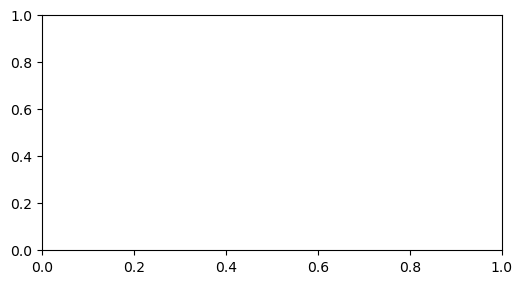

In [44]:
fig = py.figure(figsize=(5, 10), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(3,1) ; p=0

dff = df[(df.Qs>2)]# & ((df.I<-17-8.32*(df.lgWmxi-2.043)) | (df.I<-17.5)) & (df.I<-16.5)]

ax = plt.subplot(gs[p]) ; p+=1
X = 'i***'
Y = 'logV'
dff[dff.I>-17].plot.scatter(x=X, y=Y, color='k', alpha=0.1, ax=ax, label=r'$-17<M_i$')
dff[((dff.I<-17) & (dff.I>-19))].plot.scatter(x=X, y=Y, color='purple', alpha=0.1, ax=ax, label=r'$-19<M_i<-17$')
dff[((dff.I<-19) & (dff.I>-21))].plot.scatter(x=X, y=Y, color='b', alpha=0.1, ax=ax, label=r'$-19<M_i<-21$')
dff[((dff.I<-21) & (dff.I>-23))].plot.scatter(x=X, y=Y, color='green', alpha=0.1, ax=ax, label=r'$-21<M_i<-23$')
dff[((dff.I<-23) & (dff.I>-25))].plot.scatter(x=X, y=Y, color='red', alpha=0.1, ax=ax, label=r'$-23<M_i$')

x_ax, y_ax = set_axes(ax, (5,19), (1,5), fontsize=14) 
ax.set_xlabel("i* [mag]", fontsize=14)
ax.set_ylabel("log10(Vmod) [km/s]", fontsize=14)



X = dff[X].values
Y = dff[Y].values
xmin = np.min(X)
xmax = np.max(X)
for i in np.arange(xmin, xmax, 1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1 and not np.isnan(Y[ii]):
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='red', ms=6) 
        

  
    

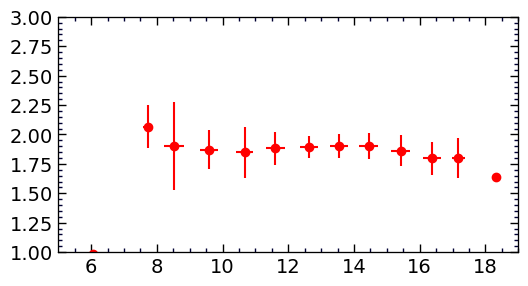

In [45]:
fig = py.figure(figsize=(5, 10), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(3,1) ; p=0

ax = plt.subplot(gs[p]) ; p+=1
X = 'i***'
Y = 'logH'
# df[df.lgWmxi>2.8].plot.scatter(x=X, y=Y, color='r', alpha=0.1, ax=ax)
# df[((df.lgWmxi<2.8) & (df.lgWmxi>2.6))].plot.scatter(x=X, y=Y, color='purple', alpha=0.1, ax=ax)
# df[((df.lgWmxi<2.6) & (df.lgWmxi>2.4))].plot.scatter(x=X, y=Y, color='green', alpha=0.1, ax=ax)
# df[((df.lgWmxi<2.4) & (df.lgWmxi>2.2))].plot.scatter(x=X, y=Y, color='blue', alpha=0.1, ax=ax)
# df[((df.lgWmxi<2.2) & (df.lgWmxi>0))].plot.scatter(x=X, y=Y, color='k', alpha=0.1, ax=ax)

x_ax, y_ax = set_axes(ax, (5,19), (1,3), fontsize=14) 



X = df[X].values
Y = df[Y].values
xmin = np.min(X)
xmax = np.max(X)
for i in np.arange(xmin, xmax, 1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1 and not np.isnan(Y[ii]):
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='red', ms=6) 
#         print(np.mean(xp), np.mean(yp))

In [46]:
df.columns

Index(['pgc', 'DMbest', 'eDMbest', 'PGC1', 'Nest', 'Vh', 'Vls', 'Vcmb', 'f',
       'DMr', 'eDMr', 'DMr_rms', 'DMr_raw', 'DMi', 'eDMi', 'DMi_rms',
       'DMi_raw', 'DMz', 'eDMz', 'DMz_rms', 'DMz_raw', 'DM_w1', 'eDM_w1',
       'DM_w1_rms', 'DM_w1_raw', 'lgWmxi', 'elgWi', 'inc', 'Qs', 'Qw', 'g***',
       'r***', 'i***', 'z***', 'w1***', 'w2***', 'R_so', 'P1_W2', 'DM_so',
       'RA', 'DE', 'GLong', 'GLat', 'SGL', 'SGB', 'Nkt', 'N15', 'SGLg', 'SGBg',
       'Vmodg', 'I', 'logD', 'logH', 'H0', 'Vmod', 'logWimx'],
      dtype='object')

/home/ehsan/anaconda3/envs/reco_base/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/ehsan/anaconda3/envs/reco_base/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/ehsan/anaconda3/envs/reco_base/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:

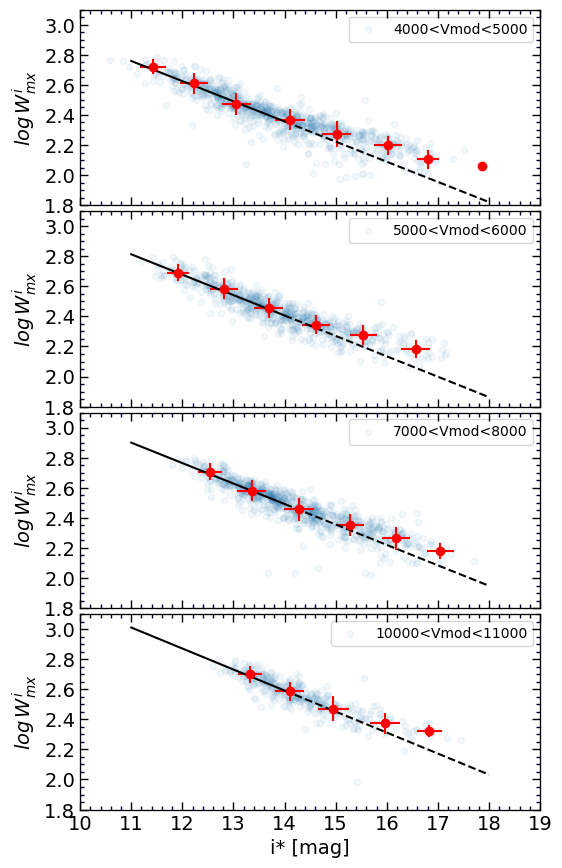

In [50]:
fig = py.figure(figsize=(5, 10), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(4,1) ; p=0

ax = plt.subplot(gs[p]) ; p+=1

dff = df[(df.lgWmxi>1.8) & (df.lgWmxi<2.8) & (df["i***"]>10)  & (df["i***"]<18) &
        (df.Vmod>4000) & (df.Vmod<5000)
        
        ]# & (df.logWimx < (c[0]-0.04)*df['i***']+c[1]+0.80)]
dff.plot.scatter(y='lgWmxi', x='i***', alpha=0.05, ax=ax, label='4000<Vmod<5000')


X = dff['i***'].values
Y = dff['lgWmxi'].values
xmin = np.min(X)
xmax = np.max(X)
lab = True
for i in np.arange(xmin, xmax, 1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
    


ind = ((X<14))    
c = np.polyfit(X[ind],Y[ind], 1)#, w=1./Ye[ind])

xx = np.linspace(14,18,100)
ax.plot(xx, c[0]*xx+c[1], 'k--')

xx = np.linspace(11,14,100)
ax.plot(xx, c[0]*xx+c[1], 'k-')

x_ax, y_ax = set_axes(ax, (10,19), (1.8,3.1), fontsize=14) 
ax.set_xlabel("i* [mag]", fontsize=14)
ax.set_ylabel(r"$log \/W^i_{mx}$", fontsize=14)
#############################################################################################




ax = plt.subplot(gs[p]) ; p+=1

dff = df[(df.lgWmxi>1.8) & (df.lgWmxi<2.8) & (df["i***"]>10)  & (df["i***"]<18) &
        (df.Vmod>5000) & (df.Vmod<6000)
        
        ]# & (df.logWimx < (c[0]-0.04)*df['i***']+c[1]+0.80)]
dff.plot.scatter(y='lgWmxi', x='i***', alpha=0.05, ax=ax, label='5000<Vmod<6000')


X = dff['i***'].values
Y = dff['lgWmxi'].values
xmin = np.min(X)
xmax = np.max(X)
lab = True
for i in np.arange(xmin, xmax, 1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
    


ind = ((X<14))    
c = np.polyfit(X[ind],Y[ind], 1)#, w=1./Ye[ind])

xx = np.linspace(14,18,100)
ax.plot(xx, c[0]*xx+c[1], 'k--')

xx = np.linspace(11,14,100)
ax.plot(xx, c[0]*xx+c[1], 'k-')

x_ax, y_ax = set_axes(ax, (10,19), (1.8,3.1), fontsize=14) 
ax.set_xlabel("i* [mag]", fontsize=14)
ax.set_ylabel(r"$log \/W^i_{mx}$", fontsize=14)


#############################################################################################



ax = plt.subplot(gs[p]) ; p+=1

dff = df[(df.lgWmxi>1.8) & (df.lgWmxi<2.8) & (df["i***"]>10)  & (df["i***"]<18) &
        (df.Vmod>7000) & (df.Vmod<8000)
        
        ]# & (df.logWimx < (c[0]-0.04)*df['i***']+c[1]+0.80)]
dff.plot.scatter(y='lgWmxi', x='i***', alpha=0.05, ax=ax, label='7000<Vmod<8000')


X = dff['i***'].values
Y = dff['lgWmxi'].values
xmin = np.min(X)
xmax = np.max(X)
lab = True
for i in np.arange(xmin, xmax, 1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
    


ind = ((X<14))    
c = np.polyfit(X[ind],Y[ind], 1)#, w=1./Ye[ind])

xx = np.linspace(14,18,100)
ax.plot(xx, c[0]*xx+c[1], 'k--')

xx = np.linspace(11,14,100)
ax.plot(xx, c[0]*xx+c[1], 'k-')


x_ax, y_ax = set_axes(ax, (10,19), (1.8,3.1), fontsize=14) 
ax.set_xlabel("i* [mag]", fontsize=14)
ax.set_ylabel(r"$log \/W^i_{mx}$", fontsize=14)



#############################################################################################

ax = plt.subplot(gs[p]) ; p+=1

dff = df[(df.lgWmxi>1.8) & (df.lgWmxi<2.8) & (df["i***"]>10)  & (df["i***"]<18) &
        (df.Vmod>10000) & (df.Vmod<11000)
        
        ]# & (df.logWimx < (c[0]-0.04)*df['i***']+c[1]+0.80)]
dff.plot.scatter(y='lgWmxi', x='i***', alpha=0.05, ax=ax, label='10000<Vmod<11000')


X = dff['i***'].values
Y = dff['lgWmxi'].values
xmin = np.min(X)
xmax = np.max(X)
lab = True
for i in np.arange(xmin, xmax, 1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
    


ind = ((X<14))    
c = np.polyfit(X[ind],Y[ind], 1)#, w=1./Ye[ind])

xx = np.linspace(14,18,100)
ax.plot(xx, c[0]*xx+c[1], 'k--')

xx = np.linspace(11,14,100)
ax.plot(xx, c[0]*xx+c[1], 'k-')

x_ax, y_ax = set_axes(ax, (10,19), (1.8,3.1), fontsize=14) 
ax.set_xlabel("i* [mag]", fontsize=14)
ax.set_ylabel(r"$log \/W^i_{mx}$", fontsize=14)




plt.subplots_adjust(hspace=0.03, wspace=0.2)

<AxesSubplot:>

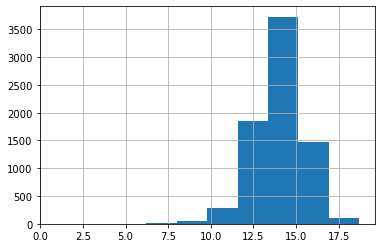

In [16]:
df['i***'].hist()

<AxesSubplot:>

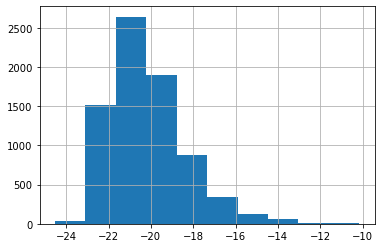

In [17]:
df['I'].hist()

Text(0, 0.5, 'inclination [deg]')

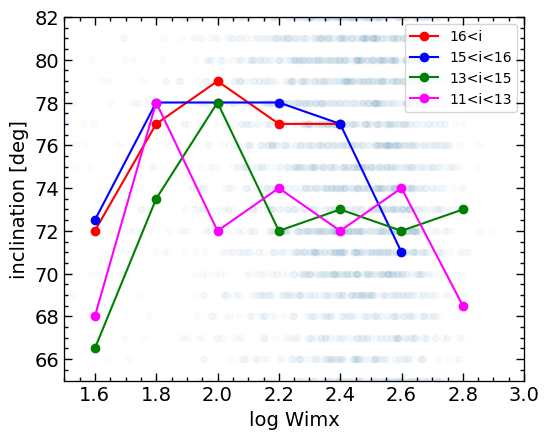

In [18]:
fig = py.figure(figsize=(5, 10), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(2,1) ; p=0

ax = plt.subplot(gs[p]) ; p+=1

df.plot.scatter(y='inc', x='logWimx', ax=ax, alpha=0.02)


ind = ((df['i***']>16) & (df['i***']<20))
X = df[ind]['logWimx'].values
Y = df[ind]['inc'].values
Xl = []
Yl = []
xmin = np.min(X)
xmax = np.max(X)
for i in np.arange(1.6, 2.6, 0.2):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.2 and not np.isnan(Y[ii]):
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
#         ax.errorbar(i, np.median(yp), yerr=np.std(yp), xerr=np.std(xp)*0, fmt='o', 
#                     color='red', ms=6) 
        Xl.append(i)
        Yl.append(np.median(yp))
ax.plot(Xl, Yl, 'ro-', label='16<i')         


ind = ((df['i***']>15) & (df['i***']<16))
X = df[ind]['logWimx'].values
Y = df[ind]['inc'].values
Xl = []
Yl = []
xmin = np.min(X)
xmax = np.max(X)
for i in np.arange(1.6, 3, 0.2):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.2 and not np.isnan(Y[ii]):
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
#         ax.errorbar(i, np.median(yp), yerr=np.std(yp)*0, xerr=np.std(xp)*0, fmt='o', 
#                     color='blue', ms=6) 
        Xl.append(i)
        Yl.append(np.median(yp))
ax.plot(Xl, Yl, 'bo-', label='15<i<16') 
        
ind = ((df['i***']>13) & (df['i***']<15))
X = df[ind]['logWimx'].values
Y = df[ind]['inc'].values
xmin = np.min(X)
xmax = np.max(X)
Xl = []
Yl = []
for i in np.arange(1.6, 3, 0.2):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.2 and not np.isnan(Y[ii]):
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
#         ax.errorbar(i, np.median(yp), yerr=np.std(yp)*0, xerr=np.std(xp)*0, fmt='o', 
#                     color='g', ms=6) 
        Xl.append(i)
        Yl.append(np.median(yp))
ax.plot(Xl, Yl, 'go-', label='13<i<15')      
        
ind = ((df['i***']>11) & (df['i***']<13))
X = df[ind]['logWimx'].values
Y = df[ind]['inc'].values
Xl = []
Yl = []
xmin = np.min(X)
xmax = np.max(X)
for i in np.arange(1.6, 3, 0.2):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.2 and not np.isnan(Y[ii]):
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
#         ax.errorbar(i, np.median(yp), yerr=np.std(yp)*0, xerr=np.std(xp)*0, fmt='o', 
#                     color='magenta', ms=6) 
        Xl.append(i)
        Yl.append(np.median(yp))
ax.plot(Xl, Yl, 'o-', color='magenta', label='11<i<13') 


ax.legend(loc=1)

x_ax, y_ax = set_axes(ax, (1.5,3), (65, 82), fontsize=14) 
ax.set_xlabel("log Wimx", fontsize=14)
ax.set_ylabel("inclination [deg]", fontsize=14)

Text(0, 0.5, 'Density')

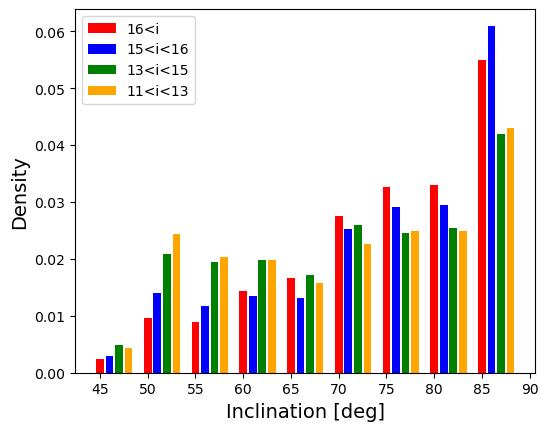

In [19]:
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import NullFormatter

fig = py.figure(figsize=(5, 10), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(2,1) ; p=0
ax = plt.subplot(gs[p]) ; p+=1

bins = np.arange(45,95,5)
bin_center = np.asarray([1.*(bins[i-1]) for i in range(1, len(bins))])


ind = ((df['i***']>16)&(df['i***']<20))
incs = df[ind]['inc']
hist, bins = np.histogram(incs, bins=bins, density=True)
ax.bar(bin_center, hist, color='red', label='16<i')


ind = ((df['i***']>15)&(df['i***']<16))
incs = df[ind]['inc']
hist, bins = np.histogram(incs, bins=bins, density=True)
ax.bar(bin_center+1, hist, color='b', label='15<i<16')

ind = ((df['i***']>13)&(df['i***']<15))
incs = df[ind]['inc']
hist, bins = np.histogram(incs, bins=bins, density=True)
ax.bar(bin_center+2, hist, color='g', label='13<i<15')


ind = ((df['i***']>11)&(df['i***']<13))
incs = df[ind]['inc']
hist, bins = np.histogram(incs, bins=bins, density=True)
ax.bar(bin_center+3, hist, label='11<i<13', color='orange')

ax.xaxis.set_major_locator(MultipleLocator(5))
# ax.xaxis.set_minor_locator(MultipleLocator(10))
    
ax.legend()

ax.set_xlabel("Inclination [deg]", fontsize=14)
ax.set_ylabel("Density", fontsize=14)

In [20]:
# df = pd.read_csv("CF4_TF_distances.csv", sep='|')
df = pd.read_csv("EDDtable17Dec2020045302.txt", sep='|')
df['Vmod'] = df.f*df.Vcmb

# df = pd.read_csv("test.csv", sep='|')

# x = df['i***']-df.DMbest
# np.max(x[df['i***']>0])
# df['I'] = x

# df['logD'] = (df['DMbest']-25)/5.
# df['logH'] = np.log10(df.f*df.Vcmb) - df['logD']
# df['H0'] = 10**df.logH


print(df.columns)
df.head()

print(len(df))

Index(['PGC', 'DMbest', 'eDMbest', 'PGC1', 'Nest', 'Vh', 'Vls', 'Vcmb', 'f',
       'DMr', 'eDMr', 'DMr_rms', 'DMr_raw', 'DMi', 'eDMi', 'DMi_rms',
       'DMi_raw', 'DMz', 'eDMz', 'DMz_rms', 'DMz_raw', 'DM_w1', 'eDM_w1',
       'DM_w1_rms', 'DM_w1_raw', 'lgWmxi', 'elgWi', 'inc', 'Qs', 'Qw', 'g***',
       'r***', 'i***', 'z***', 'w1***', 'w2***', 'R_so', 'P1_W2', 'DM_so',
       'RA', 'DE', 'GLong', 'GLat', 'SGL', 'SGB', 'Nkt', 'N15', 'SGLg', 'SGBg',
       'Vmodg', 'Vmod'],
      dtype='object')
9788


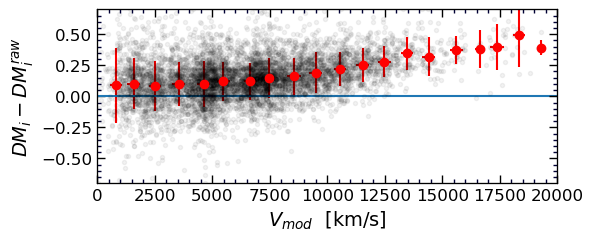

In [40]:
fig = py.figure(figsize=(5, 10), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(4,1) ; p=0

ax = plt.subplot(gs[p]) ; p+=1

dff = df[(df.Qs>0)]
Y = dff.DMi.values - dff.DMi_raw.values
X = dff.Vmod.values


xmin = np.min(X)
xmax = np.max(X)
lab = True
for i in np.arange(xmin, xmax, 1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   

ax.plot(X,Y, 'k.', alpha=0.05)

ax.set_ylim(-0.1,0.1)

set_axes(ax, (0, 20000), (-0.7, 0.7), fontsize=12)

ax.set_ylabel(r'$DM_{i}-DM^{raw}_{i}}$', fontsize=14)
ax.set_xlabel(r'$V_{mod}$'+ '  [km/s]', fontsize=14)

ax.hlines(0,0,20000)

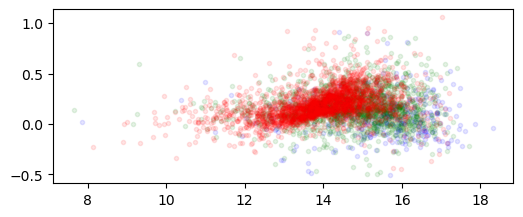

In [66]:
fig = py.figure(figsize=(5, 10), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(4,1) ; p=0

ax = plt.subplot(gs[p]) ; p+=1

df['col'] = df['g***'] - df['z***']

dff = df[(df.Qs>0) & (df.col<0.2)]
Y = dff.DMbest.values - dff.DMi_raw.values
X = dff['i***'].values
ax.plot(X,Y, 'b.', alpha=0.1)


dff = df[(df.Qs>0) & (df.col>0.2) & (df.col<0.5)]
Y = dff.DMbest.values - dff.DMi_raw.values
X = dff['i***'].values
ax.plot(X,Y, 'g.', alpha=0.1)


dff = df[(df.Qs>0) & (df.col>0.5) & (df.col<.8)]
Y = dff.DMbest.values - dff.DMi_raw.values
X = dff['i***'].values
ax.plot(X,Y, 'r.', alpha=0.1)

<AxesSubplot:>

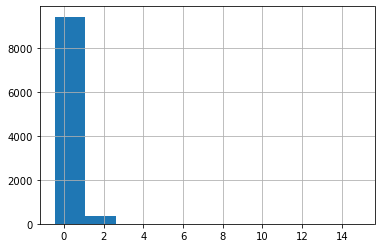

In [57]:
df.col.hist()

(-1.0, 1.0)

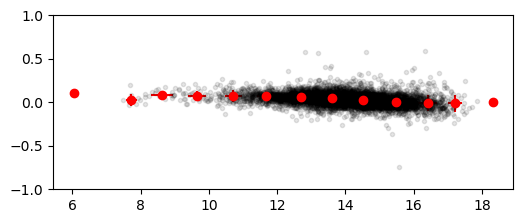

In [88]:
fig = py.figure(figsize=(5, 10), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(4,1) ; p=0

ax = plt.subplot(gs[p]) ; p+=1

df['col'] = df['g***'] - df['z***']

# dff = df[(df.Qs>0) & (df.logWimx<2.3)]
# Y = dff.DMbest.values - dff.DMi_raw.values
# X = dff['i***'].values
# ax.plot(X,Y, 'b.', alpha=0.1)


# dff = df[(df.Qs>0) & (df.logWimx>2.3) & (df.logWimx<2.5)]
# Y = dff.DMbest.values - dff.DMi_raw.values
# X = dff['i***'].values
# ax.plot(X,Y, 'g.', alpha=0.1)


dff = df[(df.Qs>0) & (df.logWimx>2.0) & (df.logWimx<3.0)]
Y = dff.DMr_raw.values - dff.DMi_raw.values
X = dff['i***'].values
ax.plot(X,Y, 'k.', alpha=0.1)



xmin = np.min(X)
xmax = np.max(X)
lab = True
for i in np.arange(xmin, xmax, 1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)  
        
ax.set_ylim(-1,1)